# ECG

## google coolab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 11.2 MB/s eta 0:00:00


## data downloader

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Clean up the environment
!rm -r *
!ls

# Step 3: Download datasets
!wget https://physionet.org/static/published-projects/qtdb/qt-database-1.0.0.zip
!wget https://physionet.org/static/published-projects/nstdb/mit-bih-noise-stress-test-database-1.0.0.zip
!ls
print('Downloading data: Done')

# Step 4: Create a directory for data
!mkdir data

# Step 5: Unzip the datasets
!unzip qt-database-1.0.0.zip >> /dev/null
!unzip mit-bih-noise-stress-test-database-1.0.0.zip >> /dev/null

# Step 6: Move the extracted folders to the data directory
!mv qt-database-1.0.0 data/
!mv mit-bih-noise-stress-test-database-1.0.0 data/

# Step 7: Remove the zip files
!rm qt-database-1.0.0.zip
!rm mit-bih-noise-stress-test-database-1.0.0.zip
!ls
!ls data
print('Extracting data: Done')

# Step 8: Move the data directory to Google Drive
!mv data /content/drive/My\ Drive/
print('Data saved to Google Drive.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
rm: cannot remove 'drive/MyDrive': Operation canceled
rm: cannot remove 'drive/.shortcut-targets-by-id': Operation canceled
rm: cannot remove 'drive/.file-revisions-by-id': Operation canceled
rm: cannot remove 'drive/.Trash-0/files': No such file or directory
rm: cannot remove 'drive/.Trash-0/info': No such file or directory
drive
--2024-10-02 11:01:17--  https://physionet.org/static/published-projects/qtdb/qt-database-1.0.0.zip
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87119682 (83M) [application/zip]
Saving to: ‘qt-database-1.0.0.zip’

qt-database-1.0.0.z 100%[===================>]  83.08M   625KB/s    in 2m 16s  

2024-10-02 11:03:34 (624 KB/s) - ‘qt-database-1.0.0.zip’ saved [87119682/87119682]

--2024-10-02 11:03:

## imports

In [3]:
# Imports
import os
import glob
import numpy as np
from scipy.signal import resample_poly
import wfdb
import math
import _pickle as pickle
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, Flatten, Dropout, BatchNormalization,concatenate, Activation, Input, Conv2DTranspose, Lambda, LSTM, Reshape, Embedding

import keras.backend as K
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, Multiply, Dense, LeakyReLU
from tensorflow.keras.models import Model
import numpy as np
import collections
import random
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, Multiply, Dense, LeakyReLU
from tensorflow.keras.models import Model
import numpy as np
import collections
import random
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, LayerNormalization, Multiply
from tensorflow.keras.models import Model
# model with leakyrelu +self attenuation + residual layer
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, LayerNormalization, Multiply, LSTM, GRU, LeakyReLU
from tensorflow.keras.models import Model
#model with residual and deleteing strides for solving output dimention problem
from keras.layers import Conv1D, Conv1DTranspose, BatchNormalization, Input, Add
# first  **Reinforcement Learning Agent** method at the end it is developed
import keras
from keras import backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, Multiply, Dense, LeakyReLU
from keras import losses
from datetime import datetime
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, LayerNormalization, Multiply, LSTM, GRU, LeakyReLU, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import keras
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

#model with self attenuation layer + residual layer
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, LayerNormalization, Multiply
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, Multiply, Dense, LeakyReLU

from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Lambda, Add, Conv1DTranspose
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, Multiply, Dense, LeakyReLU
from tensorflow.keras.models import Model
import numpy as np
import collections
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, Add, Multiply, UpSampling1D
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Lambda, Add, Conv2DTranspose
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose
from tensorflow.keras.models import Model
###############################################################################
#model with self attenuation layer + residual layer
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, LayerNormalization, Multiply
from tensorflow.keras.models import model_from_json
import glob
import wfdb
import numpy as np
import math
from scipy.signal import resample_poly
import pickle
from keras.models import Sequential
from keras.layers import LSTM, Dense



## data

In [ ]:
QTpath = '/content/drive/MyDrive/data/qt-database-1.0.0/'
newFs = 360

namesPath = glob.glob(QTpath + "/*.dat")
QTDatabaseSignals = dict()

# Process each file in the dataset
for i in namesPath:
    aux = i.split('.dat')
    register_name = aux[0].split('/')[-1]
    signal, fields = wfdb.rdsamp(aux[0])
    qu = len(signal)

    ann = wfdb.rdann(aux[0], 'pu1')
    anntype = ann.symbol
    annSamples = ann.sample

    Anntype = np.array(anntype)
    idx = Anntype == 'p'
    Pidx = annSamples[idx]
    idxS = Anntype == '('
    Sidx = annSamples[idxS]
    idxR = Anntype == 'N'
    Ridx = annSamples[idxR]

    ind = np.zeros(len(Pidx))

    for j in range(len(Pidx)):
        arr = np.where(Pidx[j] > Sidx)
        arr = arr[0]
        ind[j] = arr[-1]

    ind = ind.astype(np.int64)
    Pstart = Sidx[ind]
    Pstart = Pstart - int(0.04 * fields['fs'])

    auxSig = signal[0:qu, 0]

    beats = list()
    for k in range(len(Pstart) - 1):
        remove = (Ridx > Pstart[k]) & (Ridx < Pstart[k + 1])
        if np.sum(remove) < 2:
            beats.append(auxSig[Pstart[k]:Pstart[k + 1]])

    beatsRe = list()
    for k in range(len(beats)):
        L = math.ceil(len(beats[k]) * newFs / fields['fs'])
        normBeat = list(reversed(beats[k])) + list(beats[k]) + list(reversed(beats[k]))
        res = resample_poly(normBeat, newFs, fields['fs'])
        res = res[L - 1:2 * L - 1]
        beatsRe.append(res)

    QTDatabaseSignals[register_name] = beatsRe

# Step to save the processed signals to Google Drive
with open('/content/drive/My Drive/QTDatabaseSignals.pkl', 'wb') as f:
    pickle.dump(QTDatabaseSignals, f)

print('QTDatabaseSignals saved to Google Drive.')


QTDatabaseSignals saved to Google Drive.


noise(bw ma em)

In [ ]:
NSTDBPath = '/content/drive/MyDrive/data/mit-bih-noise-stress-test-database-1.0.0/bw'
signals, fields = wfdb.rdsamp(NSTDBPath)
for key in fields:
    print(key, fields[key])
np.save('/content/drive/MyDrive/data/NoiseBWL', signals)
with open('/content/drive/MyDrive/data/NoiseBWL.pkl', 'wb') as output:
    pickle.dump(signals, output)
print('=========================================================')
print('MIT BIH data noise stress test database (NSTDB) saved as pickle')

fs 360
sig_len 650000
n_sig 2
base_date None
base_time None
units ['mV', 'mV']
sig_name ['noise1', 'noise2']
comments []
MIT BIH data noise stress test database (NSTDB) saved as pickle


In [ ]:
NSTDBPath = '/content/drive/MyDrive/data/mit-bih-noise-stress-test-database-1.0.0/ma'
signals, fields = wfdb.rdsamp(NSTDBPath)

for key in fields:
    print(key, fields[key])

np.save('/content/drive/MyDrive/data/NoiseMA', signals)
# Save Data
with open('/content/drive/MyDrive/data/NoiseMA.pkl', 'wb') as output:
    pickle.dump(signals, output)
print('=========================================================')
print('MIT BIH data noise stress test database (NSTDB) saved as pickle')

fs 360
sig_len 650000
n_sig 2
base_date None
base_time None
units ['mV', 'mV']
sig_name ['noise1', 'noise2']
comments []
MIT BIH data noise stress test database (NSTDB) saved as pickle


In [ ]:
NSTDBPath = '/content/drive/MyDrive/data/mit-bih-noise-stress-test-database-1.0.0/em'
signals, fields = wfdb.rdsamp(NSTDBPath)

for key in fields:
    print(key, fields[key])

np.save('/content/drive/MyDrive/data/NoiseEM', signals)
# Save Data
with open('/content/drive/MyDrive/data/NoiseEM.pkl', 'wb') as output:
    pickle.dump(signals, output)
print('=========================================================')
print('MIT BIH data noise stress test database (NSTDB) saved as pickle')

fs 360
sig_len 650000
n_sig 2
base_date None
base_time None
units ['mV', 'mV']
sig_name ['noise1', 'noise2']
comments []
MIT BIH data noise stress test database (NSTDB) saved as pickle


## data merging

In [4]:
print('Getting the Data ready ... ')

# The seed is used to ensure the ECG always have the same contamination level
# this enhance reproducibility
seed = 1234
np.random.seed(seed=seed)

# Load QT Database
with open('/content/drive/MyDrive/QTDatabaseSignals.pkl', 'rb') as input:
    # dict {register_name: beats_list}
    qtdb = pickle.load(input)

# Load NSTDB BWT
with open('/content/drive/MyDrive/data/NoiseBWL.pkl', 'rb') as input:
    nstdbwl = pickle.load(input)

# Load NSTDB MA
with open('/content/drive/MyDrive/data/NoiseMA.pkl', 'rb') as input:
    nstdma = pickle.load(input)

# Load NSTDB EN
with open('/content/drive/MyDrive/data/NoiseEM.pkl', 'rb') as input:
    nstdem = pickle.load(input)


# NSTDB

noise_channel1 = nstdbwl[:, 0]
noise_channel2 = nstdbwl[:, 1]

noise_channel3 = nstdma[:, 0]
noise_channel4 = nstdma[:, 1]

noise_channel5 = nstdem[:, 0]
noise_channel6 = nstdem[:, 1]


# Data split

noise_test_bwt = np.concatenate(
    (noise_channel1[0:int(noise_channel1.shape[0] * 0.13)], noise_channel2[0:int(noise_channel2.shape[0] * 0.13)]))
noise_train_bwt = np.concatenate((noise_channel1[int(noise_channel1.shape[0] * 0.13):-1],
                              noise_channel2[int(noise_channel2.shape[0] * 0.13):-1]))

noise_test_ma = np.concatenate(
    (noise_channel3[0:int(noise_channel3.shape[0] * 0.13)], noise_channel4[0:int(noise_channel4.shape[0] * 0.13)]))
noise_train_ma = np.concatenate((noise_channel3[int(noise_channel3.shape[0] * 0.13):-1],
                              noise_channel4[int(noise_channel4.shape[0] * 0.13):-1]))

noise_test_em = np.concatenate(
    (noise_channel5[0:int(noise_channel5.shape[0] * 0.13)], noise_channel6[0:int(noise_channel6.shape[0] * 0.13)]))
noise_train_em = np.concatenate((noise_channel5[int(noise_channel5.shape[0] * 0.13):-1],
                              noise_channel6[int(noise_channel6.shape[0] * 0.13):-1]))


# QTDatabase

beats_train = []
beats_test = []

test_set = ['sel123',  # Record from MIT-BIH Arrhythmia Database
            'sel233',  # Record from MIT-BIH Arrhythmia Database

            'sel302',  # Record from MIT-BIH ST Change Database
            'sel307',  # Record from MIT-BIH ST Change Database

            'sel820',  # Record from MIT-BIH Supraventricular Arrhythmia Database
            'sel853',  # Record from MIT-BIH Supraventricular Arrhythmia Database

            'sel16420',  # Record from MIT-BIH Normal Sinus Rhythm Database
            'sel16795',  # Record from MIT-BIH Normal Sinus Rhythm Database

            'sele0106',  # Record from European ST-T Database
            'sele0121',  # Record from European ST-T Database

            'sel32',  # Record from ``sudden death'' patients from BIH
            'sel49',  # Record from ``sudden death'' patients from BIH

            'sel14046',  # Record from MIT-BIH Long-Term ECG Database
            'sel15814',  # Record from MIT-BIH Long-Term ECG Database
            ]

# Creating the train and test dataset, each datapoint has 512 samples and is zero padded
# beats bigger that 512 samples are discarded to avoid wrong split beats ans to reduce
# computation.
skip_beats = 0
samples = 512
qtdb_keys = list(qtdb.keys())

for i in range(len(qtdb_keys)):
    signal_name = qtdb_keys[i]

    for b in qtdb[signal_name]:

        b_np = np.zeros(samples)
        b_sq = np.array(b)



        init_padding = 16
        if b_sq.shape[0] > (samples - init_padding):
            skip_beats += 1
            continue

        b_np[init_padding:b_sq.shape[0] + init_padding] = b_sq - (b_sq[0] + b_sq[-1]) / 2

        if signal_name in test_set:
            beats_test.append(b_np)
        else:
            beats_train.append(b_np)



sn_train = []
sn_test = []

noise_index = 0

rnd_train = np.random.randint(low=20, high=200, size=len(beats_train)) / 100
for i in range(len(beats_train)):
    beat_max_value = np.max(beats_train[i]) - np.min(beats_train[i])

    noise_bwt = noise_train_bwt[noise_index:noise_index + samples]
    noise_max_value_bwt = np.max(noise_bwt) - np.min(noise_bwt)
    Ase_bwt = noise_max_value_bwt / beat_max_value
    alpha = rnd_train[i] / Ase_bwt

    noise_ma = noise_train_ma[noise_index:noise_index + samples]
    noise_max_value_ma = np.max(noise_ma) - np.min(noise_ma)
    Ase_ma = noise_max_value_ma / beat_max_value
    beta = rnd_train[i] / Ase_ma

    noise_em = noise_train_bwt[noise_index:noise_index + samples]
    noise_max_value_em = np.max(noise_em) - np.min(noise_em)
    Ase_em = noise_max_value_em / beat_max_value
    gamma = rnd_train[i] / Ase_em

    signal_noise = beats_train[i] + alpha/3 * noise_bwt + beta/3 * noise_ma + gamma/3 * noise_em

    sn_train.append(signal_noise)
    noise_index += samples

    if noise_index > (len(noise_train_bwt) - samples):
        noise_index = 0

noise_index = 0
rnd_test = np.random.randint(low=20, high=200, size=len(beats_test)) / 100
for i in range(len(beats_test)):
    beat_max_value = np.max(beats_test[i]) - np.min(beats_test[i])

    noise_bwt = noise_test_bwt[noise_index:noise_index + samples]
    noise_max_value_bwt = np.max(noise_bwt) - np.min(noise_bwt)
    Ase_bwt = noise_max_value_bwt / beat_max_value
    alpha = rnd_test[i] / Ase_bwt

    noise_ma = noise_test_ma[noise_index:noise_index + samples]
    noise_max_value_ma = np.max(noise_ma) - np.min(noise_ma)
    Ase_ma = noise_max_value_ma / beat_max_value
    beta = rnd_test[i] / Ase_ma

    noise_em = noise_test_bwt[noise_index:noise_index + samples]
    noise_max_value_em = np.max(noise_em) - np.min(noise_em)
    Ase_em = noise_max_value_em / beat_max_value
    gamma = rnd_test[i] / Ase_em

    signal_noise = beats_test[i] + alpha/3 * noise_bwt + beta/3 * noise_ma + gamma/3 * noise_em

    sn_test.append(signal_noise)
    noise_index += samples

    if noise_index > (len(noise_test_bwt) - samples):
        noise_index = 0

X_train = np.array(sn_train)
y_train = np.array(beats_train)

X_test = np.array(sn_test)
y_test = np.array(beats_test)

X_train = np.expand_dims(X_train, axis=2)
y_train = np.expand_dims(y_train, axis=2)

X_test = np.expand_dims(X_test, axis=2)
y_test = np.expand_dims(y_test, axis=2)

Dataset = [X_train, y_train, X_test, y_test]

print('Dataset ready to use.')

Getting the Data ready ... 
Dataset ready to use.


In [5]:
print("DATASET SHAPE")
print(f'Training {X_train.shape}')
print(f'Testing {X_test.shape}')

DATASET SHAPE
Training (72002, 512, 1)
Testing (13316, 512, 1)


## FCN_DAE_RES

In [6]:
def Conv1DTranspose(input_tensor, filters, kernel_size, strides=2, activation='relu', padding='same'):
    x = Lambda(lambda x: tf.expand_dims(x, axis=2))(input_tensor)
    x = Conv2DTranspose(filters=filters,
                        kernel_size=(kernel_size, 1),
                        activation=activation,
                        strides=(strides, 1),
                        padding=padding)(x)
    x = Lambda(lambda x: tf.squeeze(x, axis=2))(x)
    return x

## FCN_DAE_RES

In [ ]:

# improved model

def FCN_DAE_RES():
    input_shape = (512, 1)
    # Define the input layer outside the function
    input_layer = Input(shape=input_shape)
    # Encoder
    x = Conv1D(filters=100, kernel_size=16, activation='elu', strides=2, padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = Conv1D(filters=80, kernel_size=16, activation='elu', strides=2, padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = Conv1D(filters=40, kernel_size=16, activation='elu', strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv1D(filters=20, kernel_size=16, activation='elu', strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    residual = x  # Store the current feature map
    x = Conv1D(filters=20, kernel_size=16, activation='elu', strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    # Decoder
    x = Conv1DTranspose(input_tensor=x, filters=80, kernel_size=16, activation='elu', strides=1, padding='same')
    x = BatchNormalization()(x)

    x = Conv1DTranspose(input_tensor=x, filters=40, kernel_size=16, activation='elu', strides=1, padding='same')
    x = BatchNormalization()(x)

    x = Conv1DTranspose(input_tensor=x, filters=20, kernel_size=16, activation='elu', strides=2, padding='same')
    x = Add()([residual, x])  # Adding the residual connection here

    x = Conv1DTranspose(input_tensor=x, filters=20, kernel_size=16, activation='elu', strides=8, padding='same')
    x = BatchNormalization()(x)

    predictions = Conv1DTranspose(input_tensor=x, filters=1, kernel_size=16, activation='linear', strides=1, padding='same')

    model = Model(inputs=input_layer, outputs=predictions)
    return model

# Initialize the model
model = FCN_DAE_RES()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 512, 1)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 256, 80)        │          1,360 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 256, 80)        │            320 │ conv1d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 128, 40)        │         51,240 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 128, 40)        │            160 │ conv1d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 64, 20)         │         12,820 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 64, 20)         │             80 │ conv1d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 32, 20)         │          6,420 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 32, 20)         │             80 │ conv1d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 32, 1, 20)      │              0 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 32, 1, 80)      │         25,680 │ lambda[0][0]           │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_1 (Lambda)         │ (None, 32, 80)         │              0 │ conv2d_transpose[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 32, 80)         │            320 │ lambda_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_2 (Lambda)         │ (None, 32, 1, 80)      │              0 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_1        │ (None, 32, 1, 40)      │         51,240 │ lambda_2[0][0]         │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_3 (Lambda)         │ (None, 32, 40)         │              0 │ conv2d_transpose_1[0]… │
├──────────────────────

 Total params: 169,521 (662.19 KB)

 Trainable params: 168,921 (659.85 KB)

 Non-trainable params: 600 (2.34 KB)

## function used during training

In [ ]:
#os.makedirs('/content/drive/MyDrive/FCN_DAE_RES')

In [10]:
from keras.callbacks import LearningRateScheduler

def lr_schedule(epoch, lr):
    """Custom learning rate schedule."""
    if epoch % 5 == 0 and epoch > 10:  # Reduce every 10 epochs
        lr = lr * 0.5  # Reduce the learning rate by half
    return lr

In [ ]:
def train_dl(Dataset, experiment):
    print('Deep Learning pipeline: Training the model for exp ' + str(experiment))

    [X_train, y_train, X_test, y_test] = Dataset

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, shuffle=True, random_state=1)

    if experiment == 'FCN_DAE_RES':
        # FCN_DAE_leaky
        model = FCN_DAE_RES()
        model_label = 'FCN_DAE_RES'
        criterion = ssd_loss

    print('\n ' + model_label + '\n ')

    model.summary()

    epochs = 100
    batch_size = 32
    lr = 1e-3
    minimum_lr = 1e-20

    model.compile(loss=criterion,
                  optimizer=keras.optimizers.Adam(learning_rate=lr),
                  metrics=[losses.mean_squared_error, ssd_loss])

    # Checkpoint
    model_filepath = '/content/drive/MyDrive/FFCN_DAE_RES/' + model_label + '_weights.weights.h5'

    checkpoint = ModelCheckpoint(model_filepath,
                                 monitor="val_loss",
                                 verbose=1,
                                 save_best_only=True,
                                 mode='min',
                                 save_weights_only=True)

    reduce_lr = ReduceLROnPlateau(monitor="val_loss",
                                   factor=0.5,
                                   min_delta=0.01,
                                   mode='min',
                                   patience=2,
                                   min_lr=minimum_lr,
                                   verbose=1)

    early_stop = EarlyStopping(monitor="val_loss",
                               min_delta=0.0001,
                               mode='min',
                               patience=20,
                               verbose=1)

    # Define the learning rate schedule
    def lr_schedule(epoch):
        if epoch < 30:
            return 1e-3
        elif epoch < 60:
            return 1e-4
        else:
            return 1e-5

    lr_scheduler = LearningRateScheduler(lr_schedule)

    model.fit(x=X_train, y=y_train,
              validation_data=(X_val, y_val),
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              callbacks=[checkpoint, reduce_lr, early_stop, lr_scheduler])

    K.clear_session()


In [ ]:
def test_dl(Dataset, experiment):
    print('Deep Learning pipeline: Testing the model')

    [train_set, train_set_GT, X_test, y_test] = Dataset
    batch_size = 32

    if experiment == 'FCN_DAE_RES':
        model = FCN_DAE_RES()
        model_label = 'FCN_DAE_RES'
        criterion = ssd_loss

    print('\n' + model_label + '\n')
    model.summary()


    # Load weights
    model_filepath = '/content/drive/MyDrive/FCN_DAE_RES/'+model_label + '_weights.weights.h5'
    model.load_weights(model_filepath)

    # Test score
    y_pred = model.predict(X_test, batch_size=batch_size, verbose=1)
    K.clear_session()
    return [X_test, y_test, y_pred]

## train

In [ ]:
dl_experiments = ['FCN_DAE_RES']

In [14]:
import tensorflow as tf

def ssd_loss(y_true, y_pred):
    """
    Compute the Sum of Squared Differences Loss.

    Parameters:
    - y_true: Ground truth labels (true values).
    - y_pred: Predicted labels (predicted values).

    Returns:
    - loss: Computed loss value.
    """
    return tf.reduce_mean(tf.square(y_true - y_pred))


In [25]:
# Assuming dl_experiments is defined and Dataset is ready
for experiment in range(len(dl_experiments)):
    try:
        # Train the model
        print(f'Training model for experiment: {dl_experiments[experiment]}')
        train_dl(Dataset, dl_experiments[experiment])


        # Test the model
        print(f'Testing model for experiment: {dl_experiments[experiment]}')
        X_test, y_test, y_pred = test_dl(Dataset, dl_experiments[experiment])

        test_results = [X_test, y_test, y_pred]

        # Save Results
        results_filename = f'/content/drive/MyDrive/FCN_DAE/test_results_{dl_experiments[experiment]}.pkl'
        with open(results_filename, 'wb') as output:
            pickle.dump(test_results, output)

        print(f'Results from experiment {dl_experiments[experiment]} saved to {results_filename}')

    except Exception as e:
        print(f'An error occurred during experiment {dl_experiments[experiment]}: {e}')


Training model for experiment: FCN_DAE
Deep Learning pipeline: Training the model for exp FCN_DAE

 FCN_DAE
 


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 512, 1)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 256, 80)        │          1,360 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 256, 80)        │            320 │ conv1d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 128, 40)        │         51,240 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 128, 40)        │            160 │ conv1d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 64, 20)         │         12,820 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 64, 20)         │             80 │ conv1d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 32, 20)         │          6,420 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 32, 20)         │             80 │ conv1d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 32, 1, 20)      │              0 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 32, 1, 80)      │         25,680 │ lambda[0][0]           │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_1 (Lambda)         │ (None, 32, 80)         │              0 │ conv2d_transpose[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 32, 80)         │            320 │ lambda_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_2 (Lambda)         │ (None, 32, 1, 80)      │              0 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_1        │ (None, 32, 1, 40)      │         51,240 │ lambda_2[0][0]         │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_3 (Lambda)         │ (None, 32, 40)         │              0 │ conv2d_transpose_1[0]… │
├──────────────────────

 Total params: 169,521 (662.19 KB)

 Trainable params: 168,921 (659.85 KB)

 Non-trainable params: 600 (2.34 KB)

Epoch 1/100
1576/1576 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0673 - mean_squared_error: 0.0673 - ssd_loss: 0.0673
Epoch 1: val_loss improved from inf to 0.01292, saving model to /content/drive/MyDrive/FCN_DAE/FCN_DAE_weights.weights.h5
1576/1576 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - loss: 0.0673 - mean_squared_error: 0.0673 - ssd_loss: 0.0673 - val_loss: 0.0129 - val_mean_squared_error: 0.0129 - val_ssd_loss: 0.0129 - learning_rate: 0.0010
Epoch 2/100
1574/1576 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - ssd_loss: 0.0110
Epoch 2: val_loss did not improve from 0.01292
1576/1576 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - ssd_loss: 0.0110 - val_loss: 0.0179 - val_mean_squared_error: 0.0179 - val_ssd_loss: 0.0179 - learning_rate: 0.0010
Epoch 3/100
1566/1576 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - mean_squared_error: 0.0091 - ssd_loss: 0.0091
Epoch 3: val_loss improved from 0.01292 to 0.00718, saving model

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 512, 1)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 256, 80)        │          1,360 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 256, 80)        │            320 │ conv1d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 128, 40)        │         51,240 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 128, 40)        │            160 │ conv1d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 64, 20)         │         12,820 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 64, 20)         │             80 │ conv1d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 32, 20)         │          6,420 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 32, 20)         │             80 │ conv1d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 32, 1, 20)      │              0 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 32, 1, 80)      │         25,680 │ lambda[0][0]           │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_1 (Lambda)         │ (None, 32, 80)         │              0 │ conv2d_transpose[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 32, 80)         │            320 │ lambda_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_2 (Lambda)         │ (None, 32, 1, 80)      │              0 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_1        │ (None, 32, 1, 40)      │         51,240 │ lambda_2[0][0]         │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_3 (Lambda)         │ (None, 32, 40)         │              0 │ conv2d_transpose_1[0]… │
├──────────────────────

 Total params: 169,521 (662.19 KB)

 Trainable params: 168,921 (659.85 KB)

 Non-trainable params: 600 (2.34 KB)

417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Results from experiment FCN_DAE saved to /content/drive/MyDrive/FCN_DAE/test_results_FCN_DAE.pkl


## test metrics

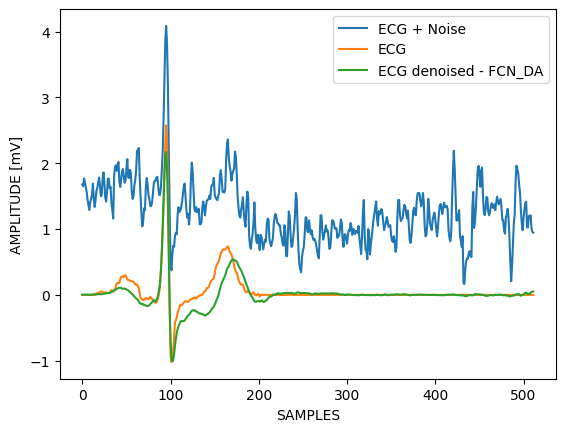

In [29]:
plt.plot(X_test[3390], label="ECG + Noise")
plt.plot(y_test[3390], label="ECG")
plt.plot(y_pred[3390], label="ECG denoised - FCN_DA")

plt.xlabel("SAMPLES")
plt.ylabel("AMPLITUDE [mV]")
plt.legend()
plt.show()

12293


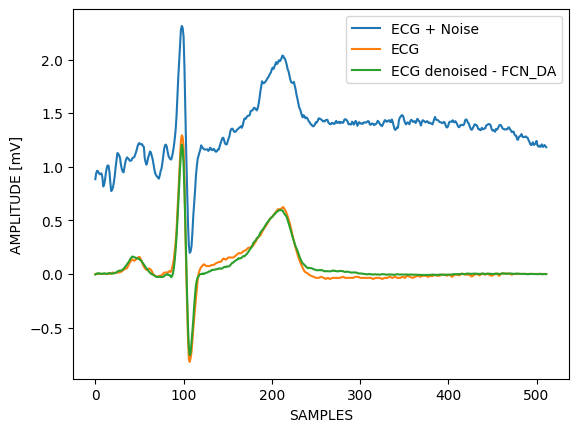

5868


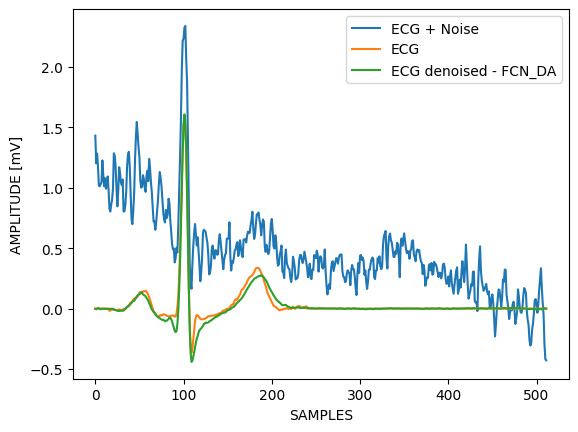

12305


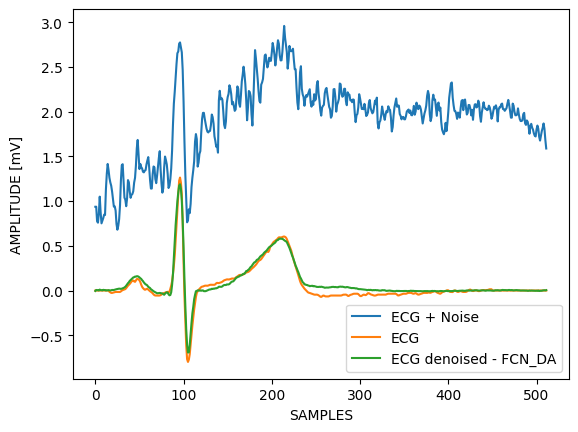

1777


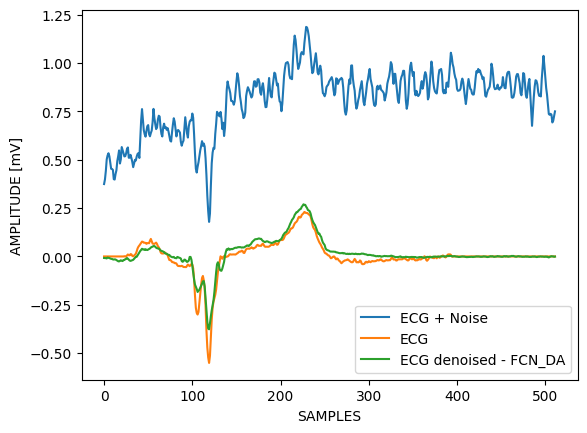

5327


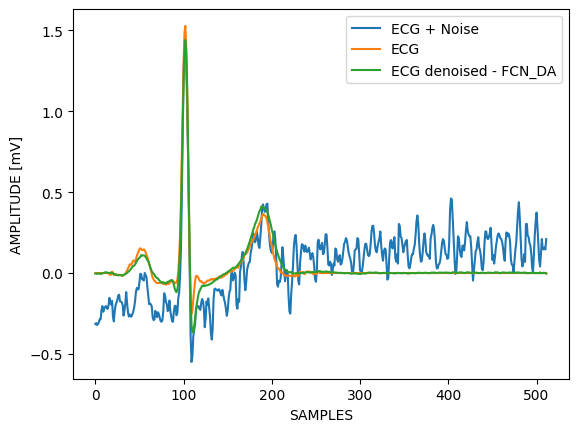

11848


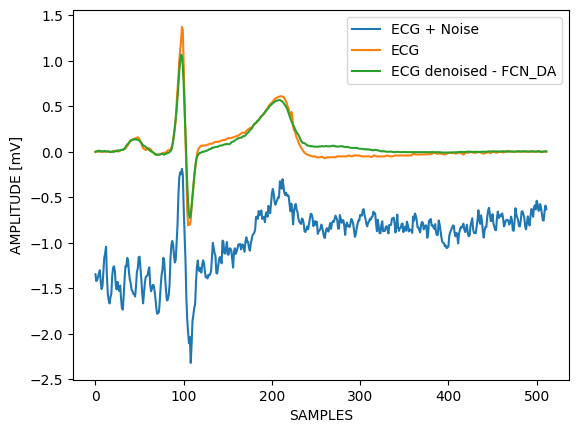

10827


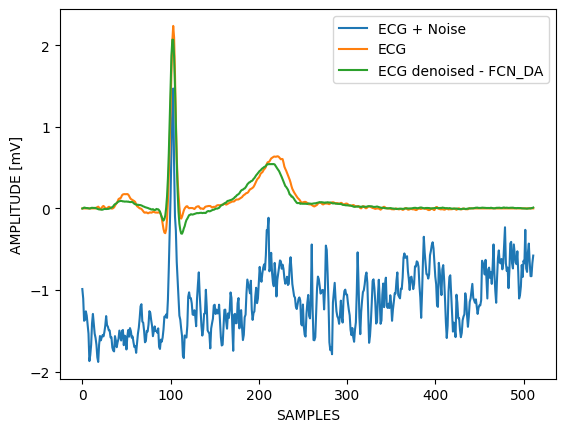

1231


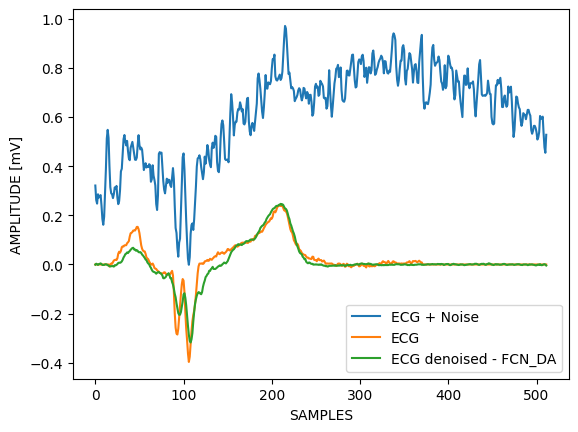

8702


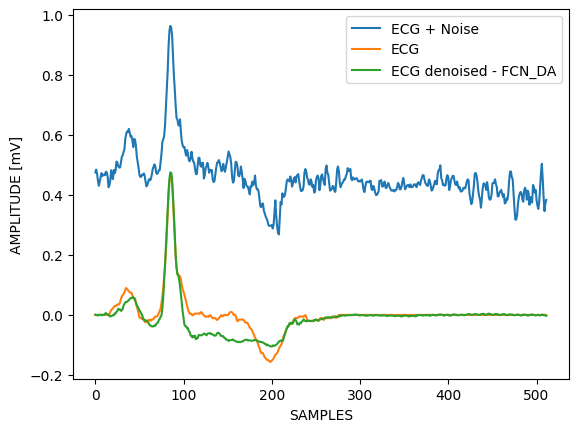

11337


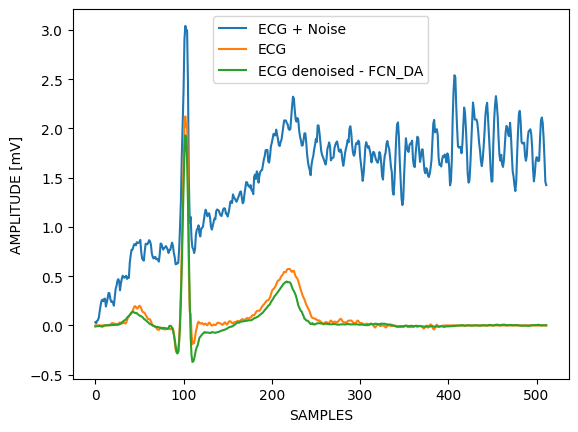

3171


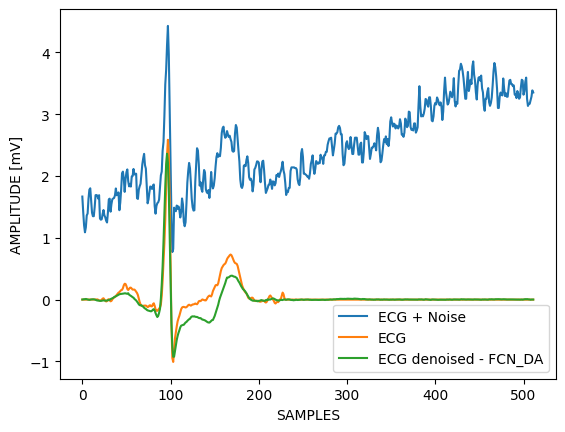

5404


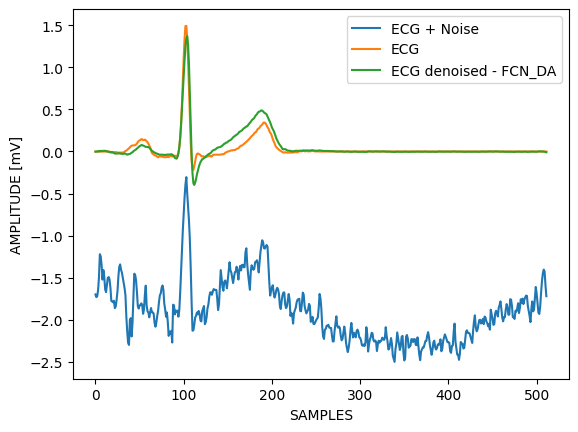

1659


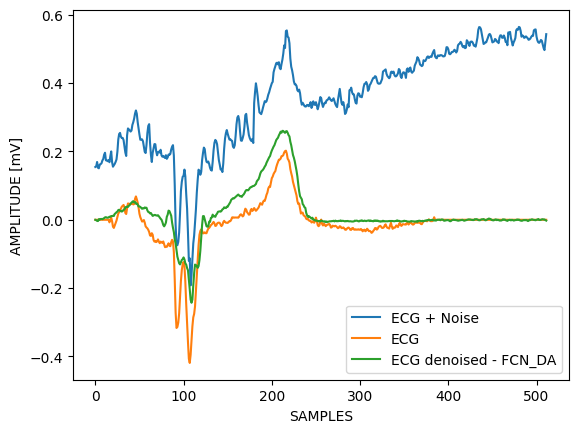

10032


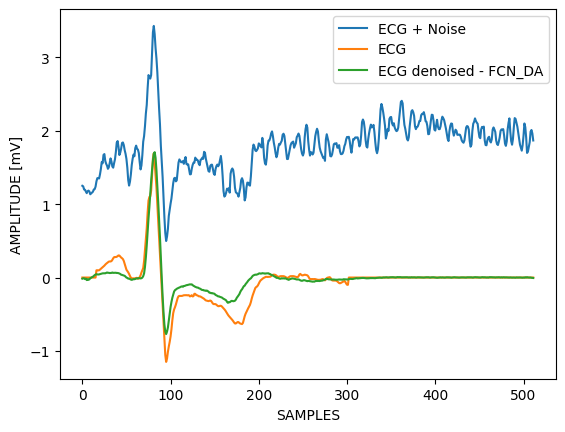

5464


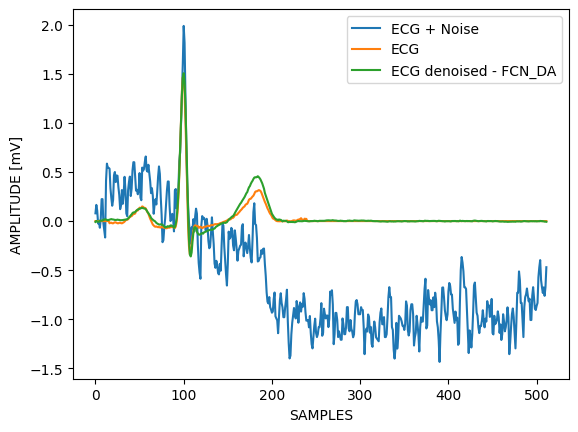

11257


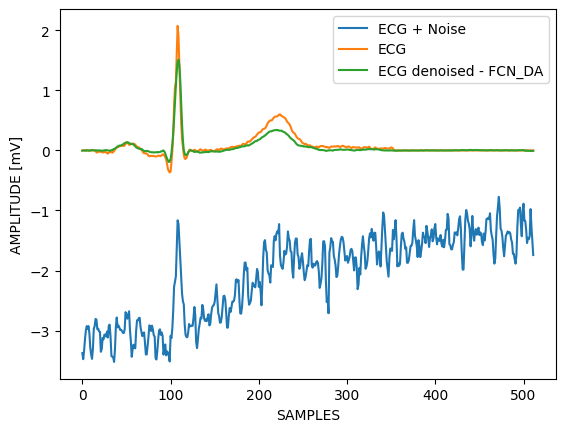

11230


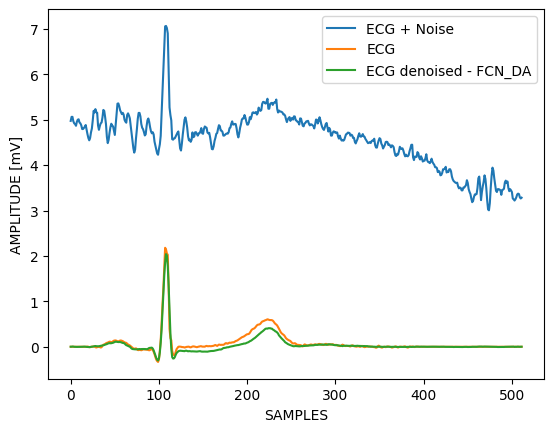

648


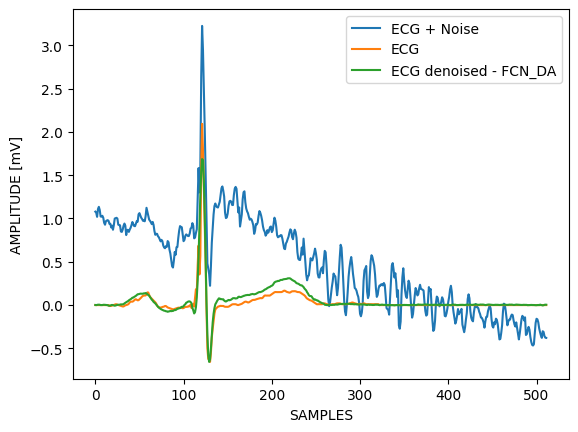

3640


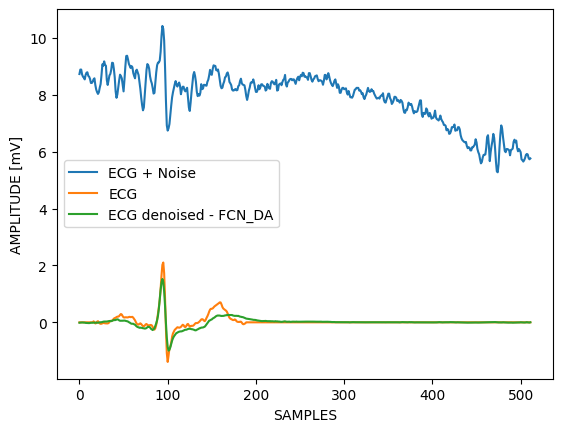

8684


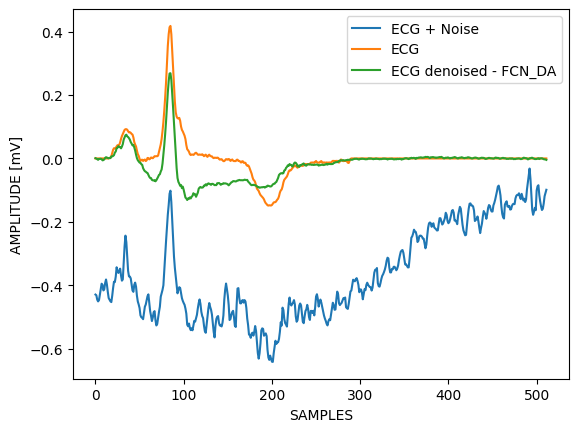

11573


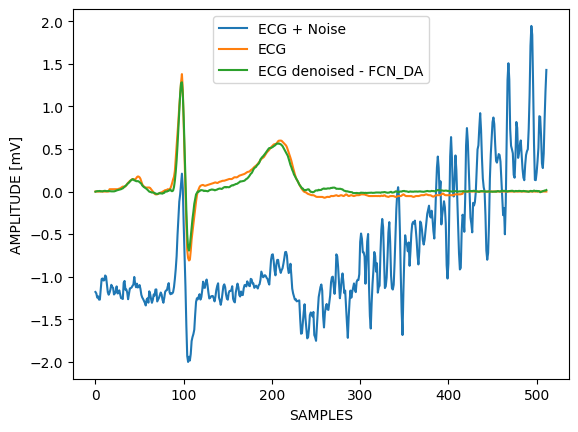

554


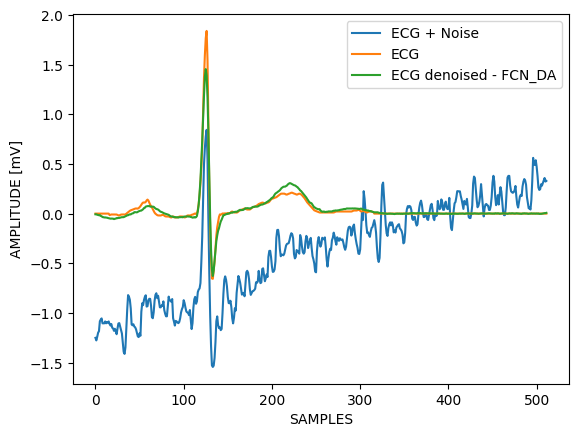

8678


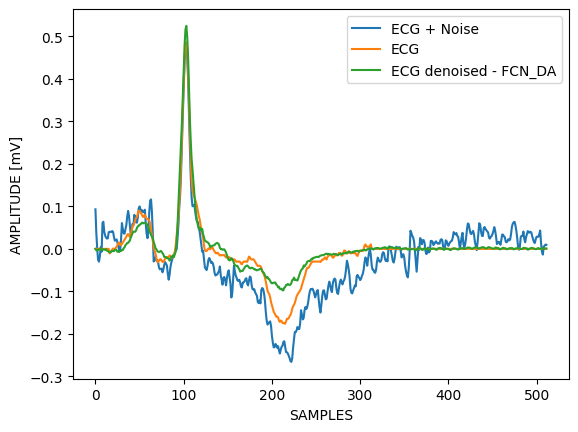

7647


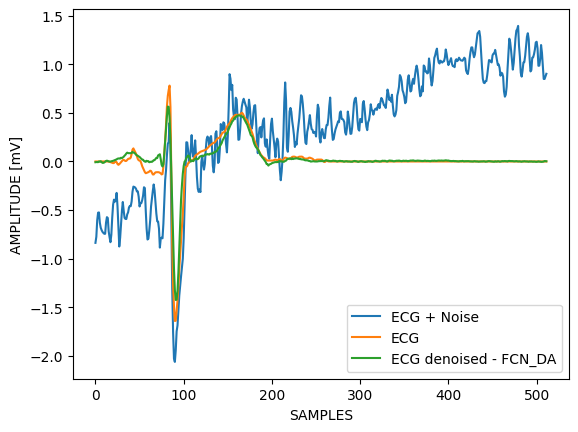

5975


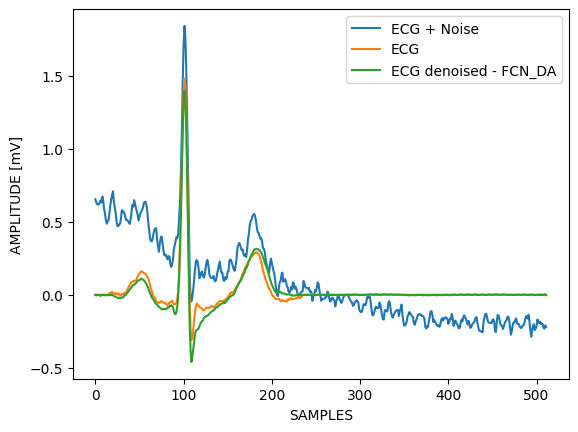

3347


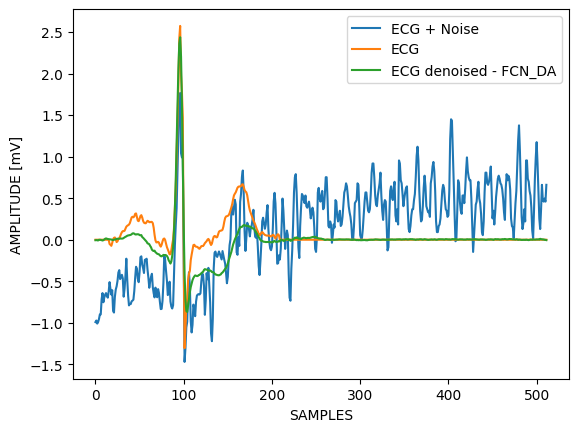

10547


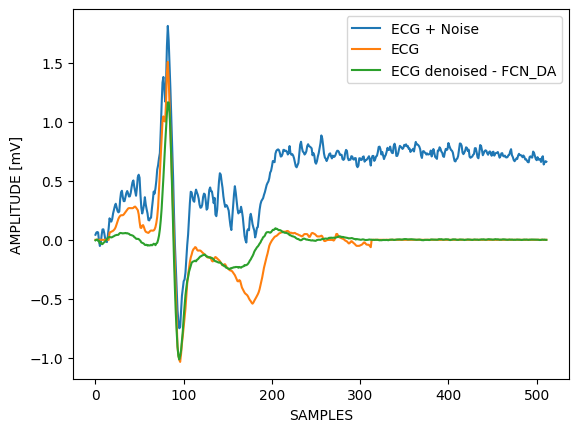

1471


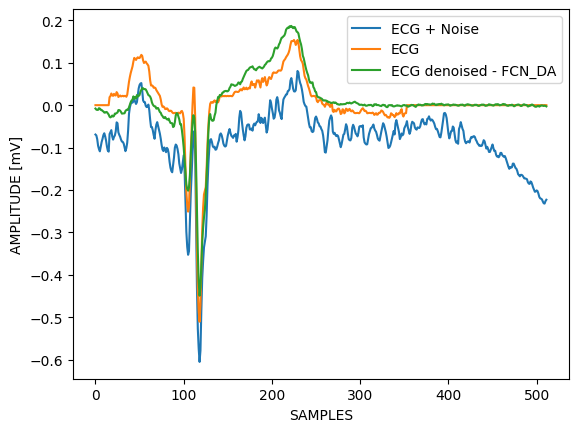

11382


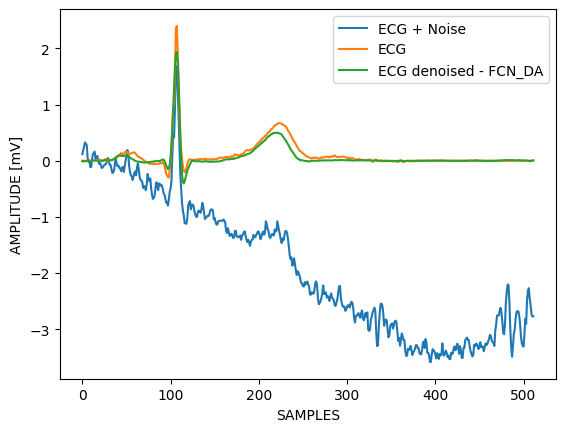

1474


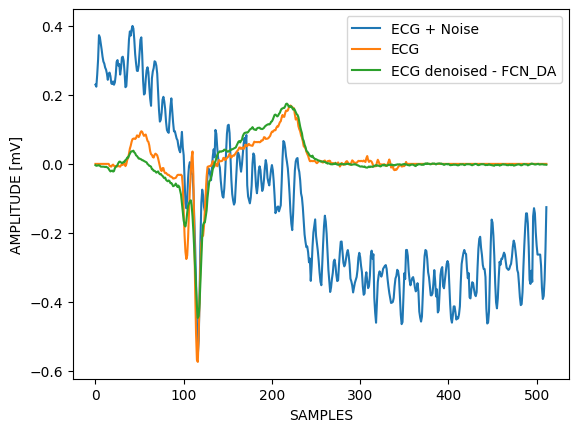

2510


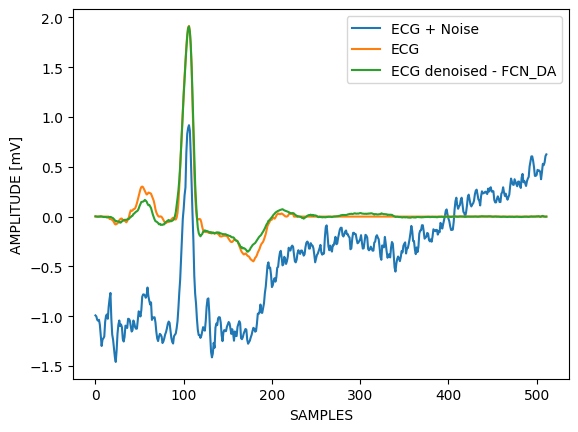

7624


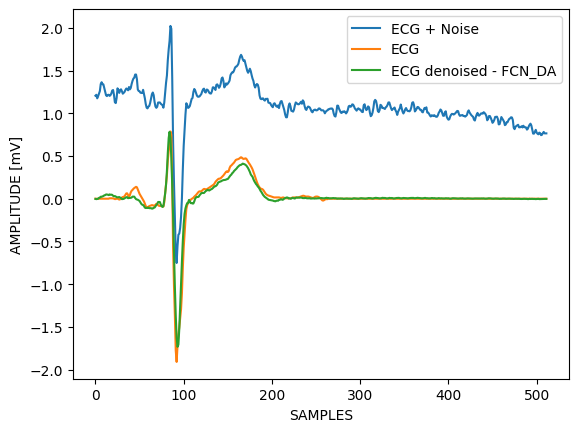

6395


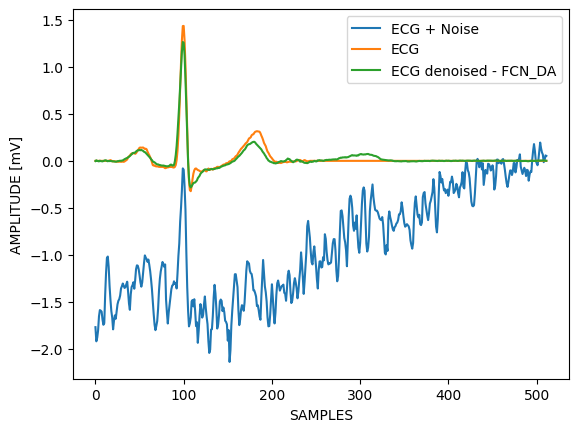

3354


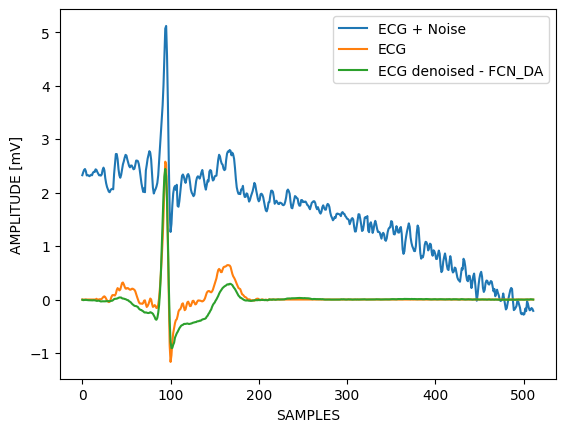

392


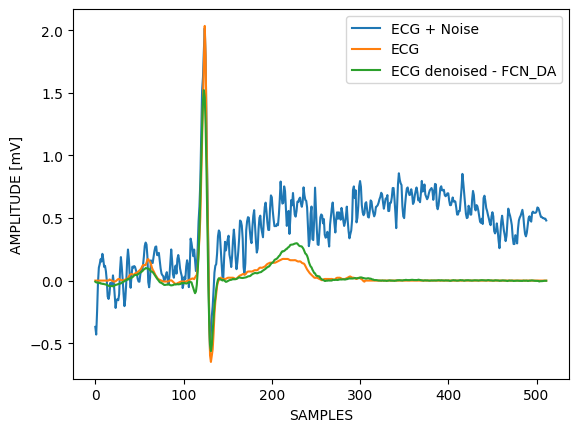

4438


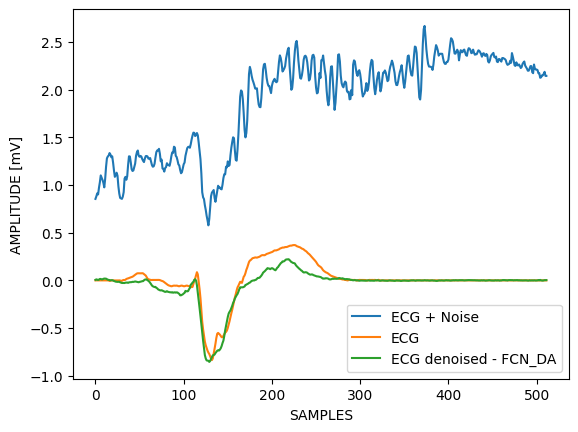

10803


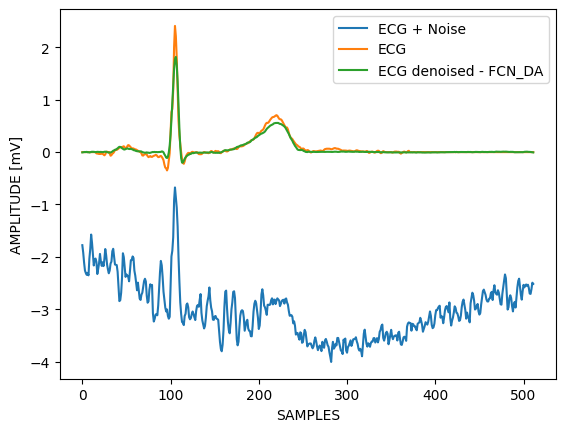

12148


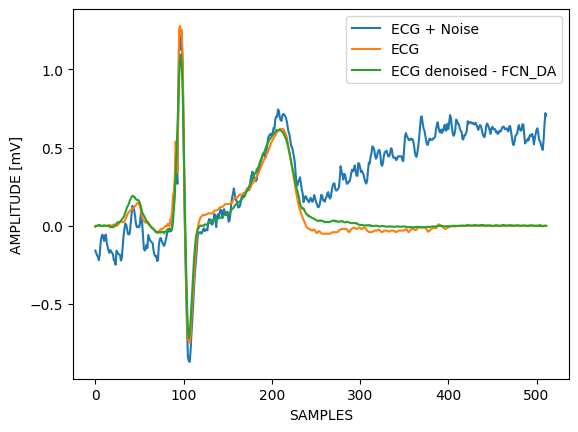

7758


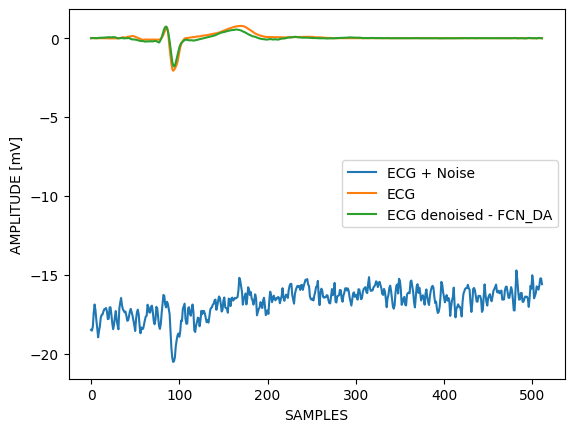

7842


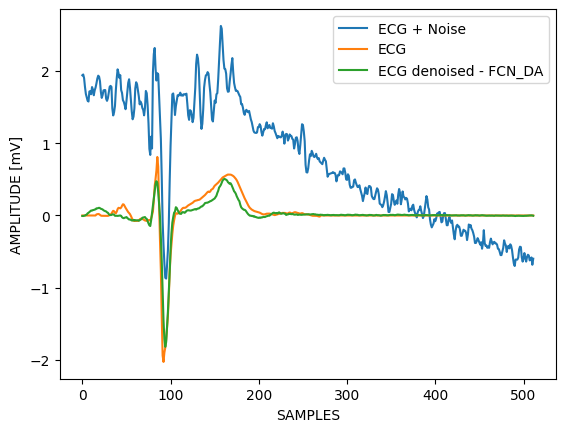

5652


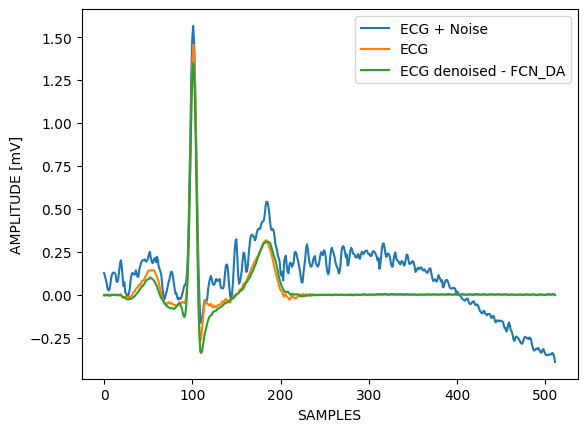

11873


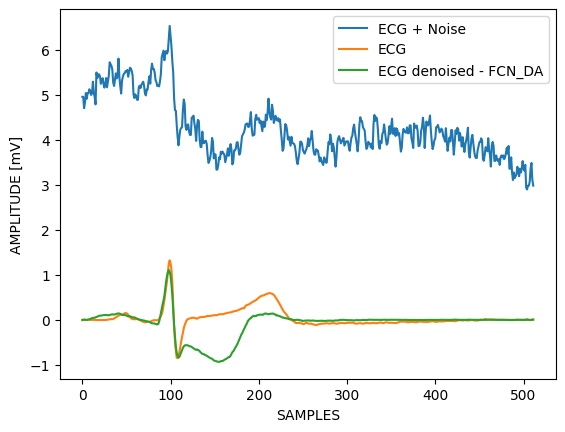

10498


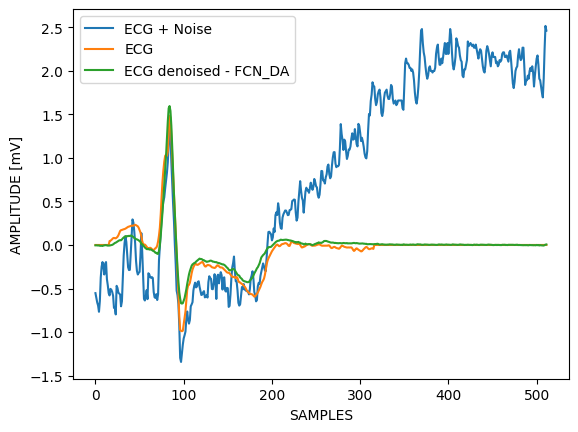

9386


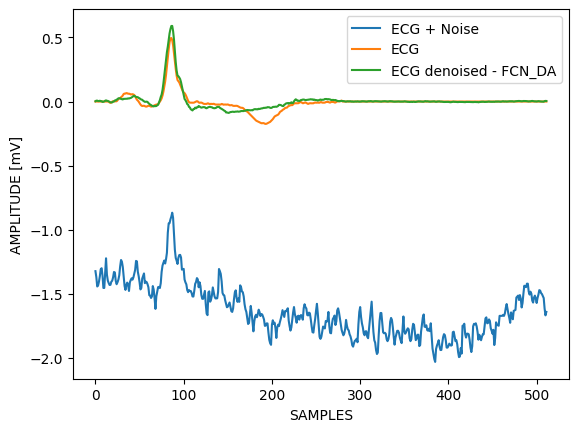

11950


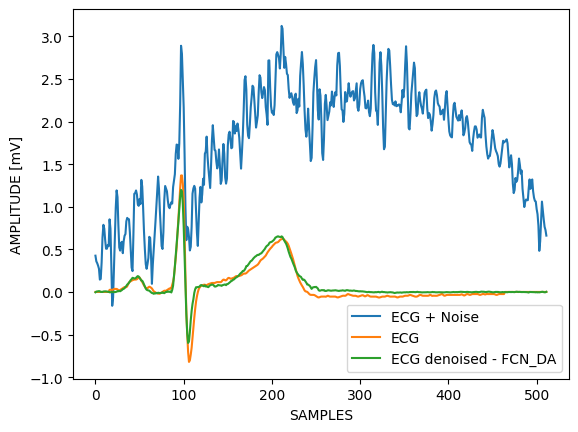

12213


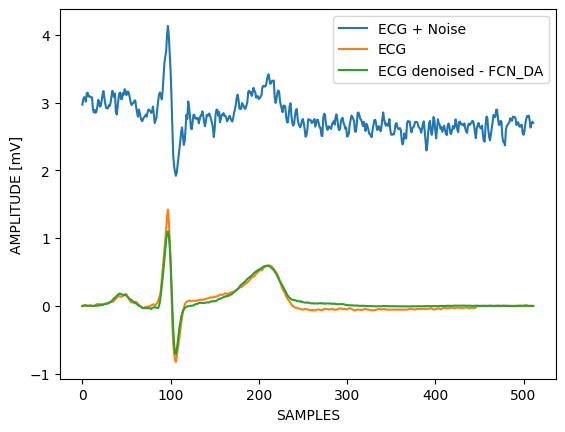

9603


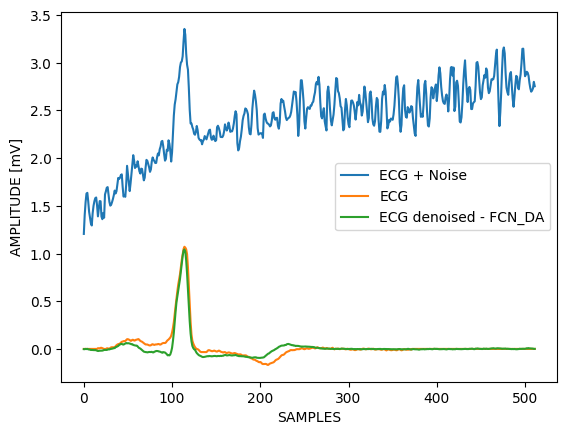

2992


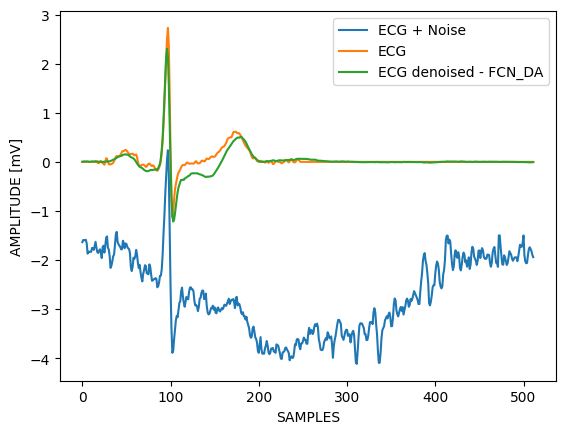

9202


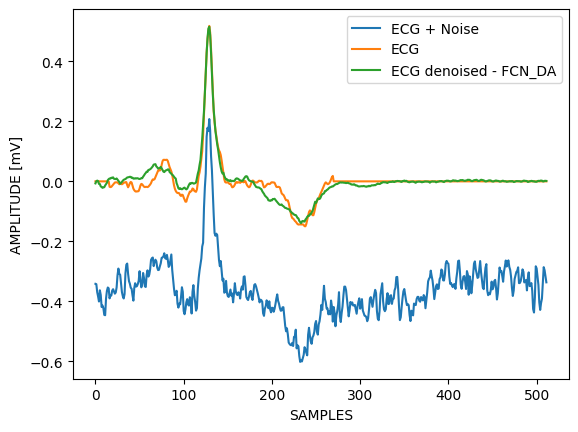

3959


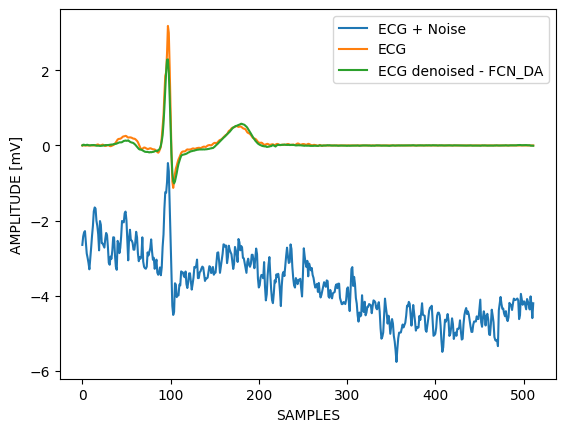

In [30]:
for x in np.random.randint(13000, size=50):
  print(x)
  plt.plot(X_test[x], label="ECG + Noise")
  plt.plot(y_test[x], label="ECG")
  plt.plot(y_pred[x], label="ECG denoised - FCN_DA")

  plt.xlabel("SAMPLES")
  plt.ylabel("AMPLITUDE [mV]")
  plt.legend()
  plt.show()

1


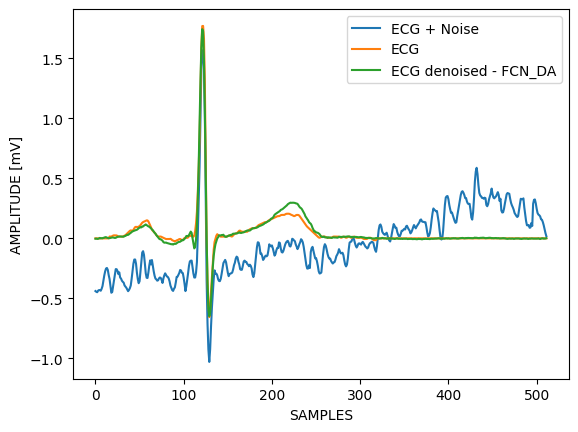

5


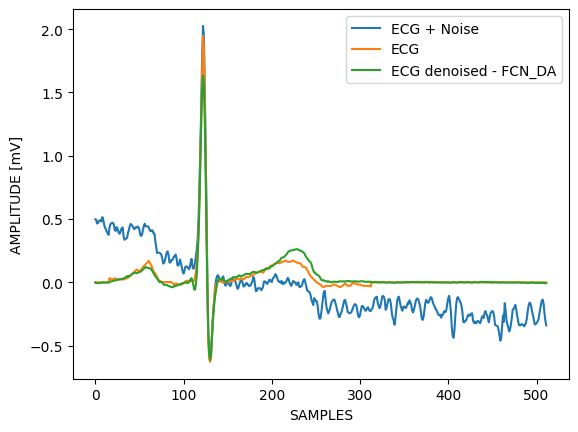

9


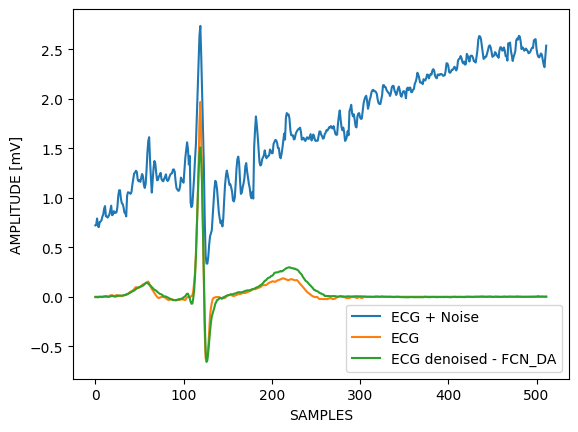

13


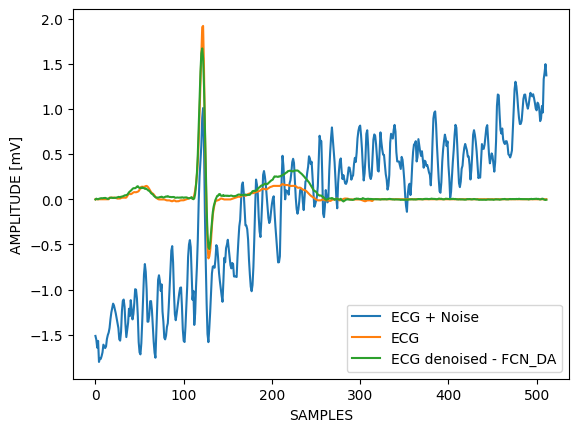

17


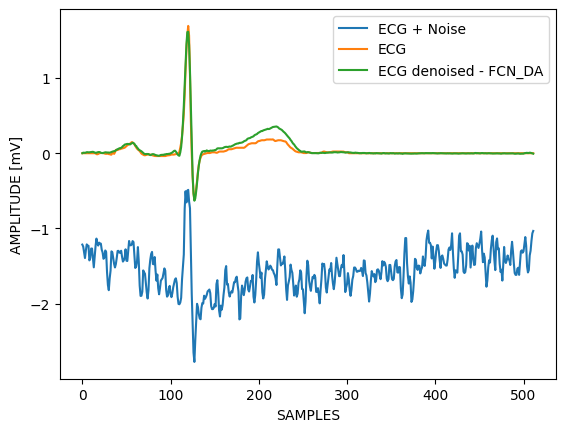

21


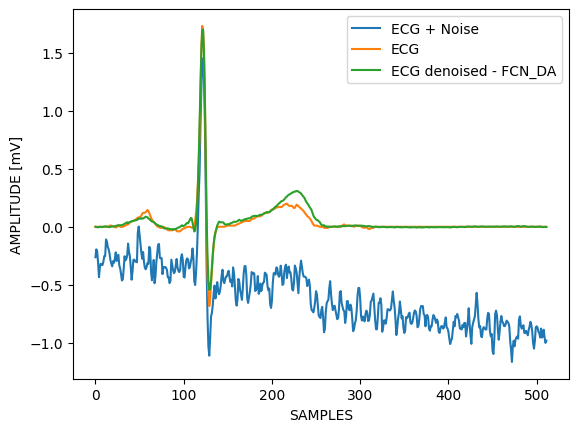

25


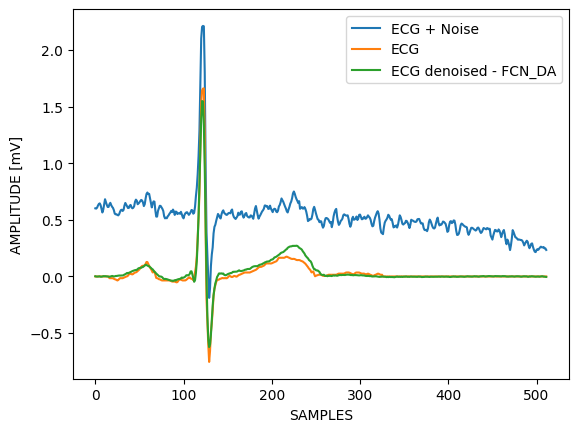

29


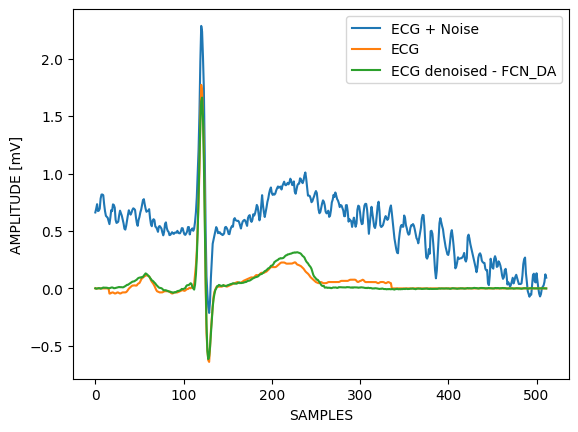

33


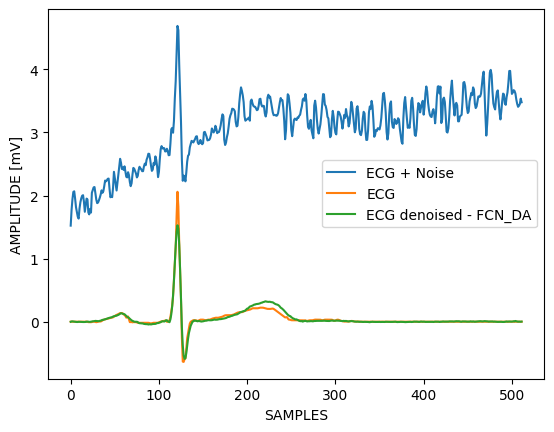

37


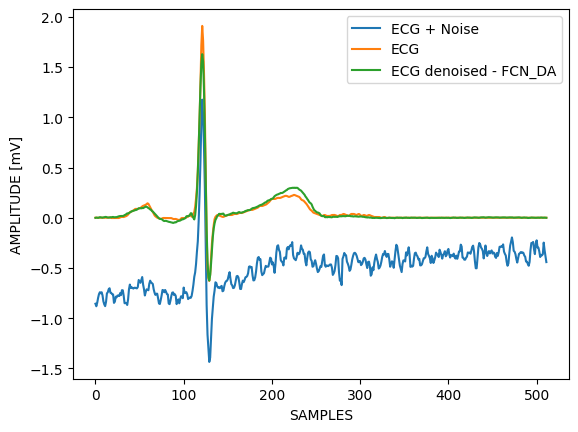

41


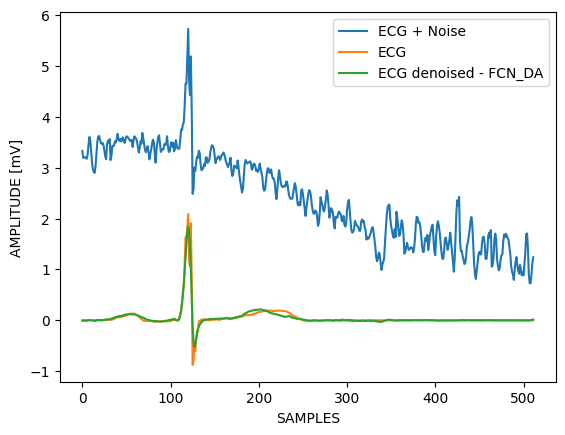

45


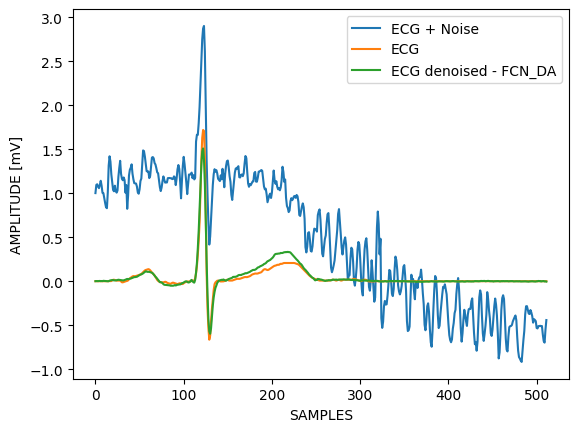

49


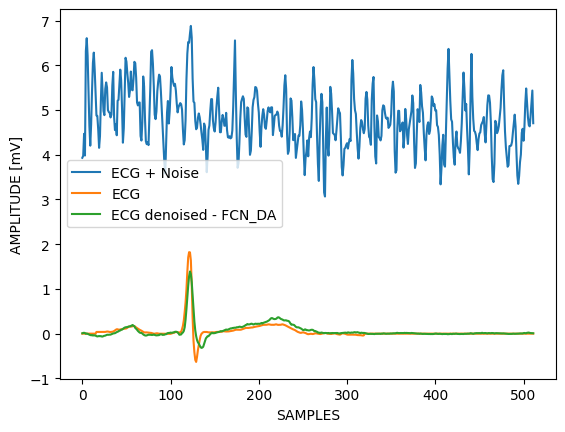

53


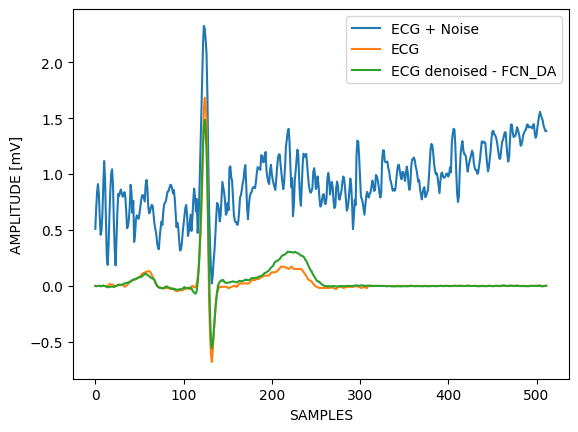

57


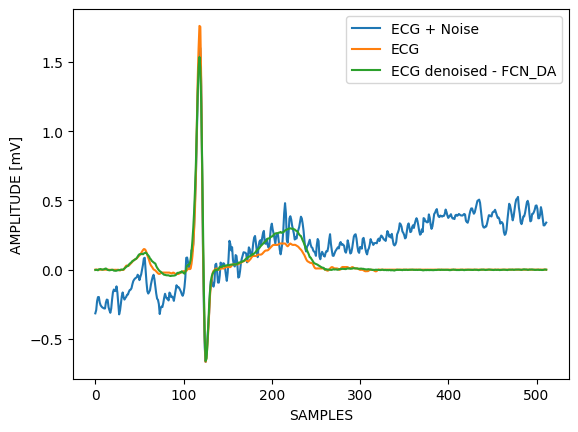

61


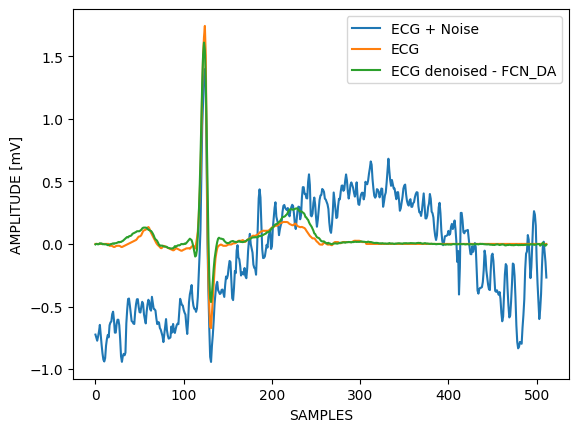

65


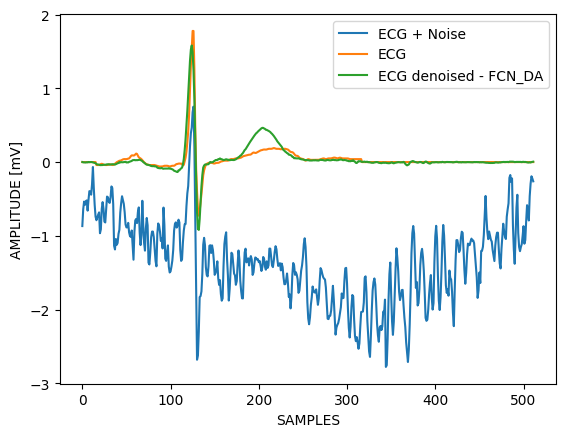

69


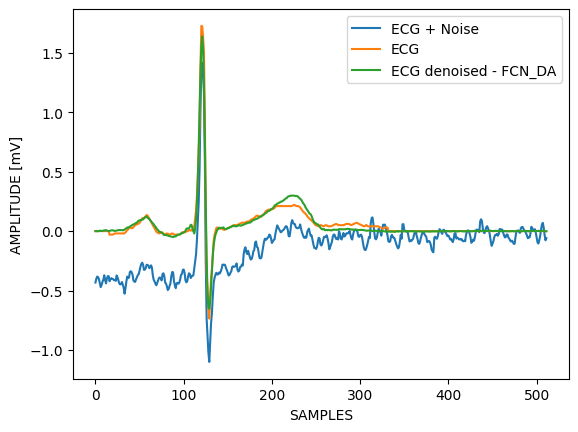

73


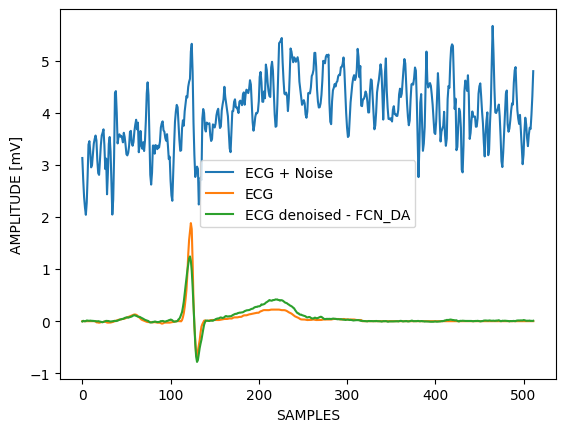

77


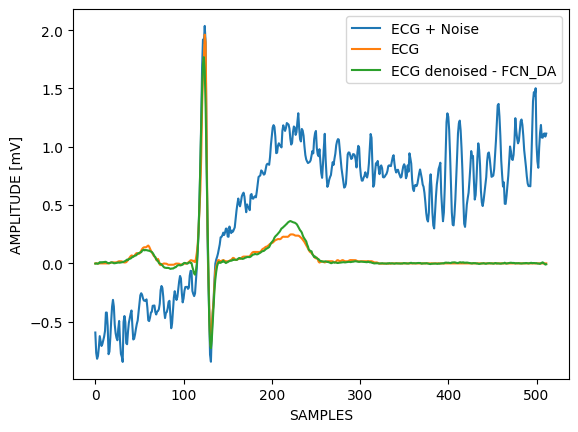

81


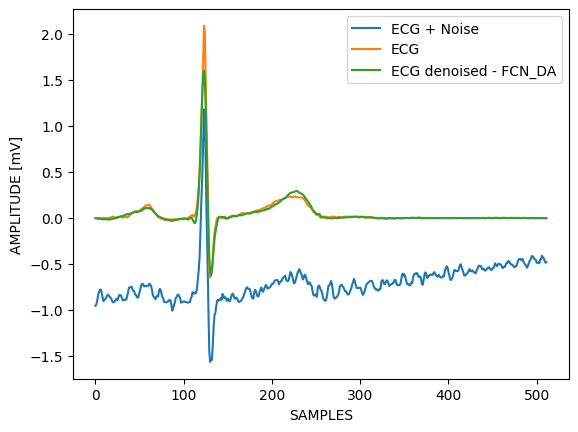

85


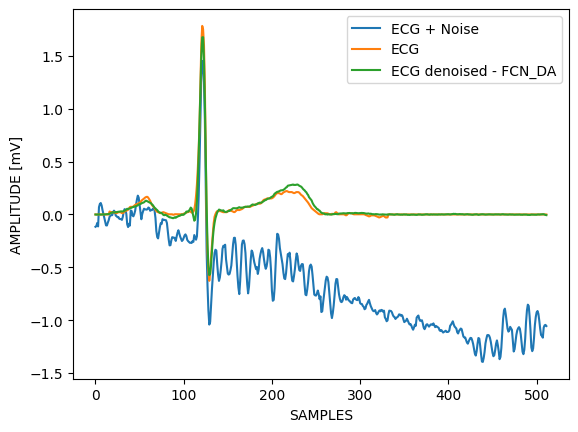

89


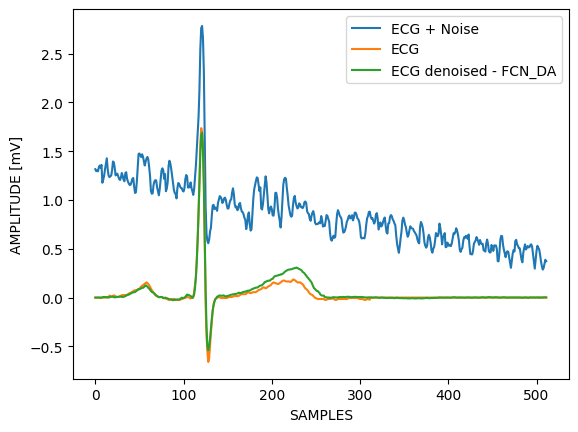

93


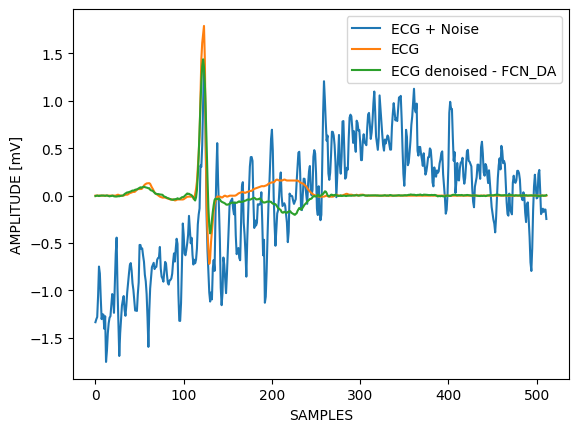

97


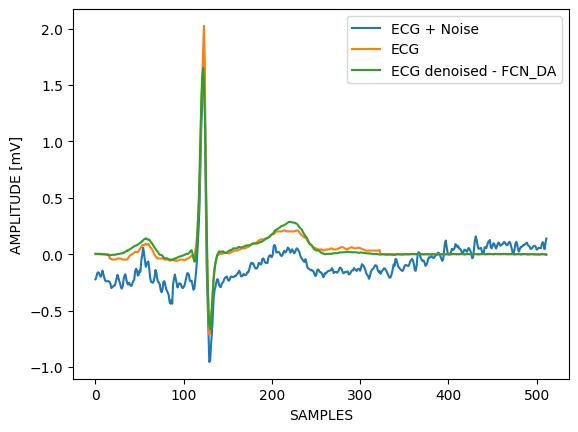

In [31]:
for x in range(1,100,4):
  print(x)
  plt.plot(X_test[x], label="ECG + Noise")
  plt.plot(y_test[x], label="ECG")
  plt.plot(y_pred[x], label="ECG denoised - FCN_DA")

  plt.xlabel("SAMPLES")
  plt.ylabel("AMPLITUDE [mV]")
  plt.legend()
  plt.show()